# Purchase Time Series Preparation

The main purpose here is to prepare for sample data to try different forecasting methods later.

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf

## Prepare Sample Data

* Find specific merchants, create training, testing

In [2]:
ts_purchase_df = pd.read_pickle('ts_purchase.pkl')
print(ts_purchase_df.shape, ts_purchase_df['merchant'].nunique())

ts_purchase_df.head()

(5568, 4) 49


,merchant,purchase_date,purchase_amount,client_count
0,49th Parallel Grocery,2019-02-11,58743.49,470
1,49th Parallel Grocery,2019-02-12,73984.82,686
2,49th Parallel Grocery,2019-02-13,95749.55,876
3,49th Parallel Grocery,2019-02-14,118723.62,1095
4,49th Parallel Grocery,2019-02-15,152350.76,1379


In [6]:
agg_df = ts_purchase_df[['merchant', 'purchase_date']].astype('str').drop_duplicates()\
          .groupby(['merchant'], as_index=False)['purchase_date']\
          .agg(['count']).reset_index()\
          .sort_values(['count'], ascending=False)

print(min(agg_df['count']), max(agg_df['count']))
agg_df.head()

110 114


,merchant,count
0,49th Parallel Grocery,114
21,Lalumière Bonanza,114
23,Le Marché Esposito,114
1,Asian Food Centre,114
25,Lococo's,114


Yeah, I assigned the purchase dates in uniformal distribution. This mean choose whatever merchant here is similar.

### Sample 1

In [77]:
sample_ts_df = ts_purchase_df.loc[ts_purchase_df['merchant']=='49th Parallel Grocery']
print(sample_ts_df.shape)

sample_ts_df.head()

(114, 4)


,merchant,purchase_date,purchase_amount,client_count
0,49th Parallel Grocery,2019-02-11,58743.49,470
1,49th Parallel Grocery,2019-02-12,73984.82,686
2,49th Parallel Grocery,2019-02-13,95749.55,876
3,49th Parallel Grocery,2019-02-14,118723.62,1095
4,49th Parallel Grocery,2019-02-15,152350.76,1379


In [78]:
import warnings
warnings.filterwarnings("ignore")

sample_ts_df['purchase_date'] = sample_ts_df['purchase_date'].astype('datetime64[ns]')

print(sample_ts_df.dtypes)
sample_ts_df.head()

merchant                   object
purchase_date      datetime64[ns]
purchase_amount           float64
client_count                int64
dtype: object


,merchant,purchase_date,purchase_amount,client_count
0,49th Parallel Grocery,2019-02-11,58743.49,470
1,49th Parallel Grocery,2019-02-12,73984.82,686
2,49th Parallel Grocery,2019-02-13,95749.55,876
3,49th Parallel Grocery,2019-02-14,118723.62,1095
4,49th Parallel Grocery,2019-02-15,152350.76,1379


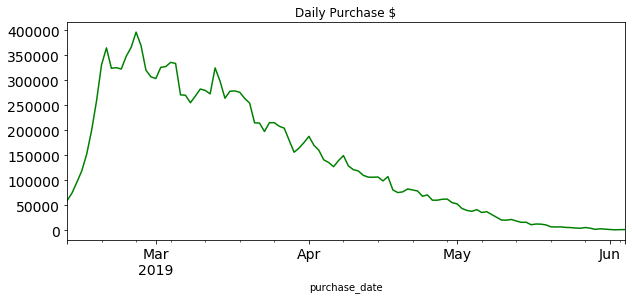

In [79]:
# Plotting data
sample_ts_df.index = sample_ts_df['purchase_date']
sample_ts_df['purchase_amount'].plot(figsize=(10,4), title= 'Daily Purchase $', fontsize=14, color='green')
plt.show()

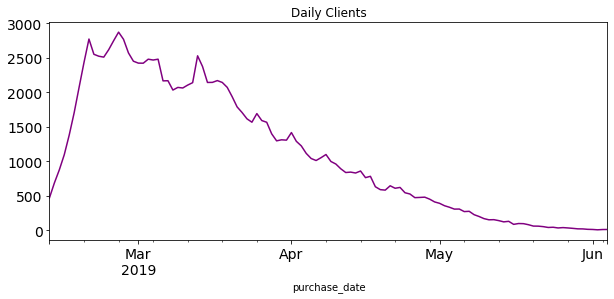

In [80]:
sample_ts_df['client_count'].plot(figsize=(10, 4), title= 'Daily Clients', fontsize=14, color='purple')
plt.show()

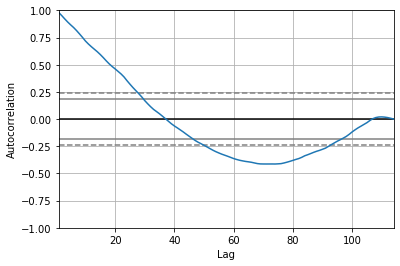

In [42]:
# Autocorrelation plot
autocorrelation_plot(sample_ts_df['purchase_amount'])
plt.show()

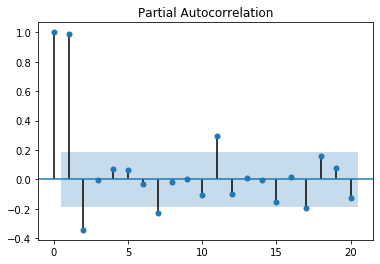

In [57]:
plot_pacf(sample_ts_df['purchase_amount'], lags=20);

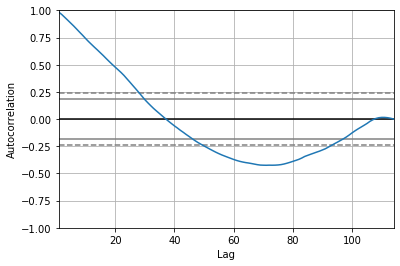

In [43]:
autocorrelation_plot(sample_ts_df['client_count'])
plt.show()

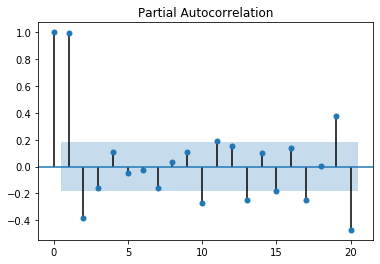

In [58]:
plot_pacf(sample_ts_df['client_count'], lags=20);

#### Notes
* In the data, the pattern of client_count and purchase_amount are almost the same.
* The autocorrelation plot (ACF)
  * It summarizes the relationship between an observation in a time series with observations at prior time steps. The relationship here include direct and indirect correlations.
  * From above plots, it's exponential, decaying to 0, so it can be AR (Autoregressive) model
* The partial autocorrelation (PACF)
  * It is similar to autocorrelation plot, but removes those indirect correlations.
* We can start with `AR(2)` or `AR(3)`, since it's showing the first 2,3 lags have strong correlations.

In [82]:
sample_ts_df.drop(['merchant', 'purchase_date'], inplace=True, axis=1)

In [83]:
sample_train_df = sample_ts_df.iloc[0:100, :]
sample_test_df = sample_ts_df.iloc[100:, :]

print(sample_train_df.shape, sample_test_df.shape)
sample_train_df.head()

(100, 2) (14, 2)


,purchase_amount,client_count
purchase_date,,
2019-02-11,58743.49,470
2019-02-12,73984.82,686
2019-02-13,95749.55,876
2019-02-14,118723.62,1095
2019-02-15,152350.76,1379


In [84]:
sample_train_df.to_pickle('sample_train_df1.pkl')
sample_test_df.to_pickle('sample_test_df1.pkl')

### Sample 2

In [85]:
sample_ts_df = ts_purchase_df.loc[ts_purchase_df['merchant']=="Vince's Market"]
print(sample_ts_df.shape)

sample_ts_df.head()

(110, 4)


,merchant,purchase_date,purchase_amount,client_count
5458,Vince's Market,2019-02-11,3915.15,23
5459,Vince's Market,2019-02-12,2315.15,31
5460,Vince's Market,2019-02-13,4291.80,47
5461,Vince's Market,2019-02-14,4153.07,48
5462,Vince's Market,2019-02-15,7358.73,75


In [86]:
sample_ts_df['purchase_date'] = sample_ts_df['purchase_date'].astype('datetime64[ns]')

print(sample_ts_df.dtypes)
sample_ts_df.head()

merchant                   object
purchase_date      datetime64[ns]
purchase_amount           float64
client_count                int64
dtype: object


,merchant,purchase_date,purchase_amount,client_count
5458,Vince's Market,2019-02-11,3915.15,23
5459,Vince's Market,2019-02-12,2315.15,31
5460,Vince's Market,2019-02-13,4291.80,47
5461,Vince's Market,2019-02-14,4153.07,48
5462,Vince's Market,2019-02-15,7358.73,75


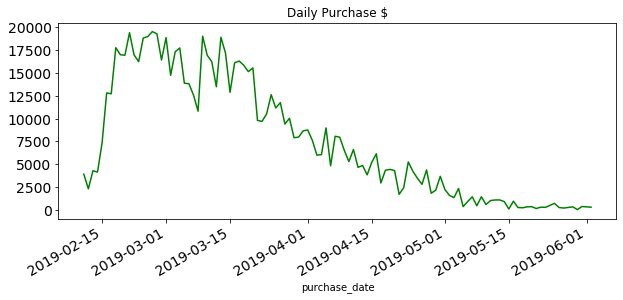

In [87]:
# Plotting data
sample_ts_df.index = sample_ts_df['purchase_date']
sample_ts_df['purchase_amount'].plot(figsize=(10,4), title= 'Daily Purchase $', fontsize=14, color='green')
plt.show()

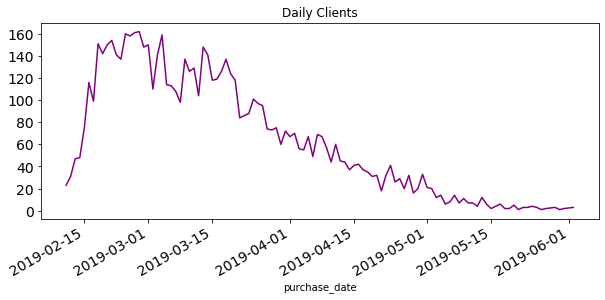

In [88]:
sample_ts_df['client_count'].plot(figsize=(10, 4), title= 'Daily Clients', fontsize=14, color='purple')
plt.show()

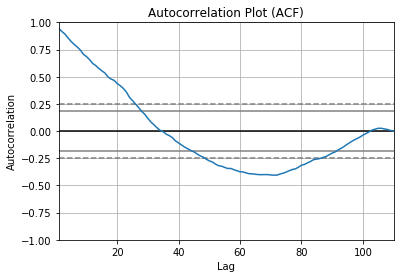

In [90]:
# Autocorrelation plot
autocorrelation_plot(sample_ts_df['purchase_amount'])
plt.title('Autocorrelation Plot (ACF)')
plt.show()

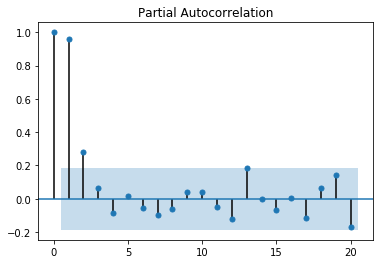

In [94]:
plot_pacf(sample_ts_df['client_count'], lags=20);

#### Notes
* In the data, the pattern of client_count and purchase_amount are almost the same.
* The autocorrelation plot (ACF)
  * It summarizes the relationship between an observation in a time series with observations at prior time steps. The relationship here include direct and indirect correlations.
  * From above plots, it's exponential, decaying to 0, so it can be AR (Autoregressive) model
* The partial autocorrelation (PACF)
  * It is similar to autocorrelation plot, but removes those indirect correlations.
* We can start with `AR(2)` or `AR(3)`, since it's showing the first 2,3 lags have strong correlations.

In [96]:
sample_ts_df.drop(['merchant', 'purchase_date'], inplace=True, axis=1)

In [97]:
sample_train_df = sample_ts_df.iloc[0:100, :]
sample_test_df = sample_ts_df.iloc[100:, :]

print(sample_train_df.shape, sample_test_df.shape)
sample_train_df.head()

(100, 2) (10, 2)


,purchase_amount,client_count
purchase_date,,
2019-02-11,3915.15,23
2019-02-12,2315.15,31
2019-02-13,4291.80,47
2019-02-14,4153.07,48
2019-02-15,7358.73,75


In [98]:
sample_train_df.to_pickle('sample_train_df2.pkl')
sample_test_df.to_pickle('sample_test_df2.pkl')